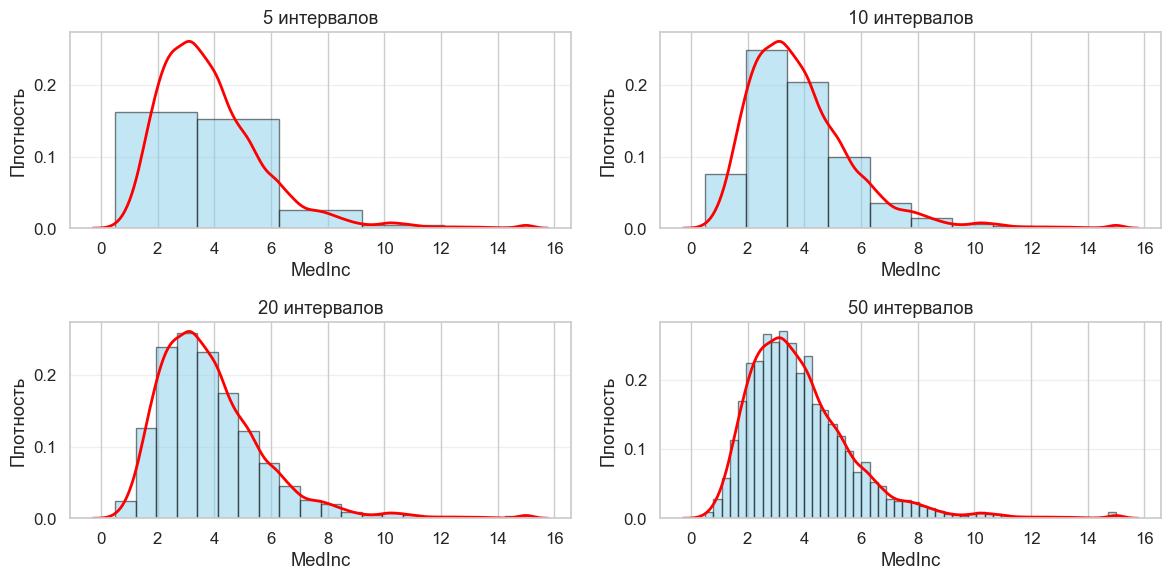

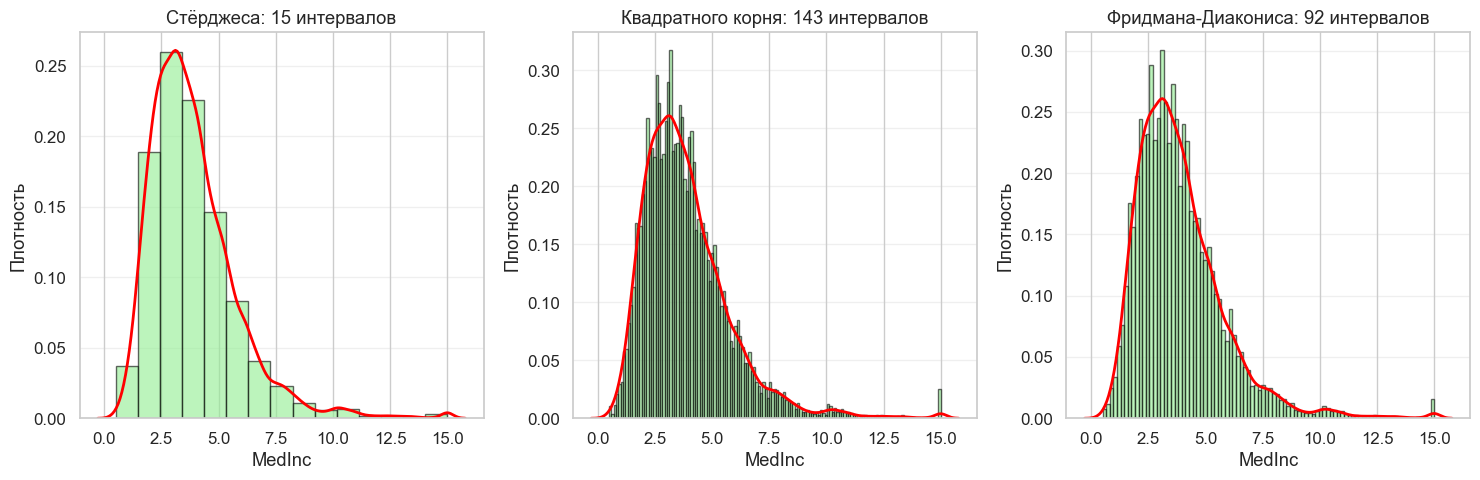

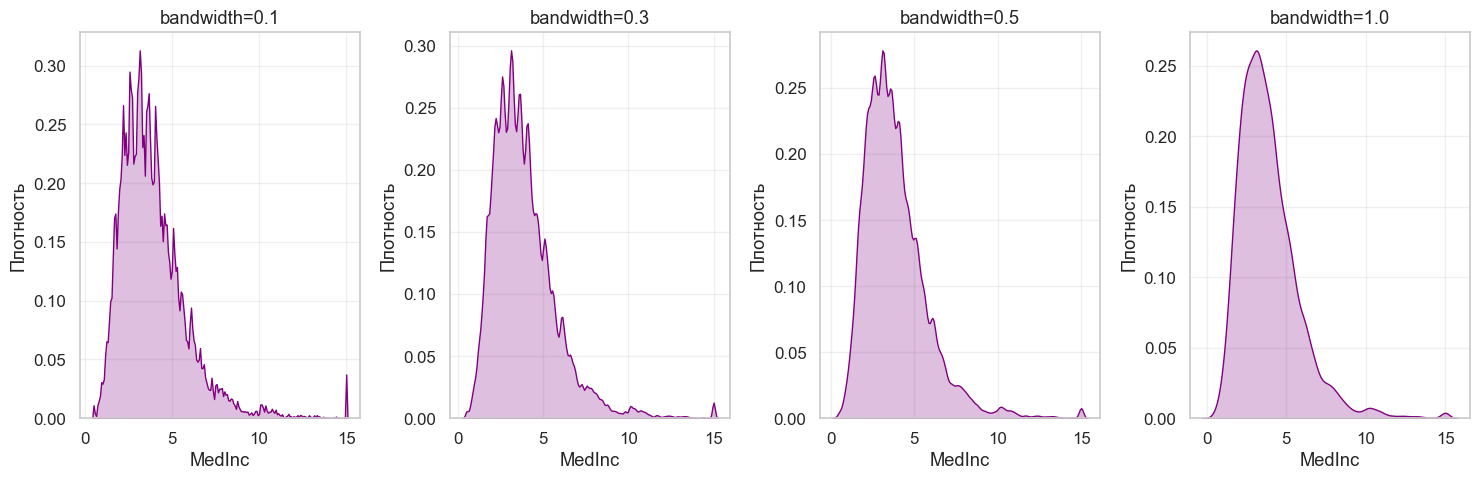

In [17]:
# Импорт библиотек
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
california = fetch_california_housing()
housing_data = pd.DataFrame(california.data, columns=california.feature_names)
housing_data["MedHouseVal"] = california.target

# Основной признак для анализа
feature = "MedInc"

# Шаг 1: Комбинированный график (гистограмма + KDE + boxplot)
plt.figure(figsize=(12, 6))

# Гистограмма с различным количеством интервалов
bins_list = [5, 10, 20, 50]
for i, bins in enumerate(bins_list, 1):
    plt.subplot(2, 2, i)
    plt.hist(
        housing_data[feature],
        bins=bins,
        density=True,
        alpha=0.5,
        color="skyblue",
        edgecolor="black",
    )
    sns.kdeplot(housing_data[feature], color="red", linewidth=2)
    plt.title(f"{bins} интервалов")
    plt.xlabel("MedInc")
    plt.ylabel("Плотность")
    plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# Шаг 2: Правила выбора количества интервалов
n = len(housing_data[feature])

# Правило Стёрджеса
bins_sturges = int(1 + 3.322 * np.log10(n))

# Правило квадратного корня
bins_sqrt = int(np.sqrt(n))

# Правило Фридмана-Диакониса
iqr = np.percentile(housing_data[feature], 75) - np.percentile(
    housing_data[feature], 25
)
bin_width = 2 * iqr * (n ** (-1 / 3))
bins_fd = int(
    np.ceil((housing_data[feature].max() - housing_data[feature].min()) / bin_width)
)

plt.figure(figsize=(15, 5))

rules = [
    ("Стёрджеса", bins_sturges),
    ("Квадратного корня", bins_sqrt),
    ("Фридмана-Диакониса", bins_fd),
]
for i, (name, bins) in enumerate(rules, 1):
    plt.subplot(1, 3, i)
    plt.hist(
        housing_data[feature],
        bins=bins,
        density=True,
        alpha=0.6,
        color="lightgreen",
        edgecolor="black",
    )
    sns.kdeplot(housing_data[feature], color="red", linewidth=2)
    plt.title(f"{name}: {bins} интервалов")
    plt.xlabel("MedInc")
    plt.ylabel("Плотность")
    plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# Шаг 3: Влияние ширины окна KDE на гладкость кривой
bandwidths = [0.1, 0.3, 0.5, 1.0]

plt.figure(figsize=(15, 5))
for i, bw in enumerate(bandwidths, 1):
    plt.subplot(1, 4, i)
    sns.kdeplot(housing_data[feature], bw_adjust=bw, color="purple", fill=True)
    plt.title(f"bandwidth={bw}")
    plt.xlabel("MedInc")
    plt.ylabel("Плотность")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

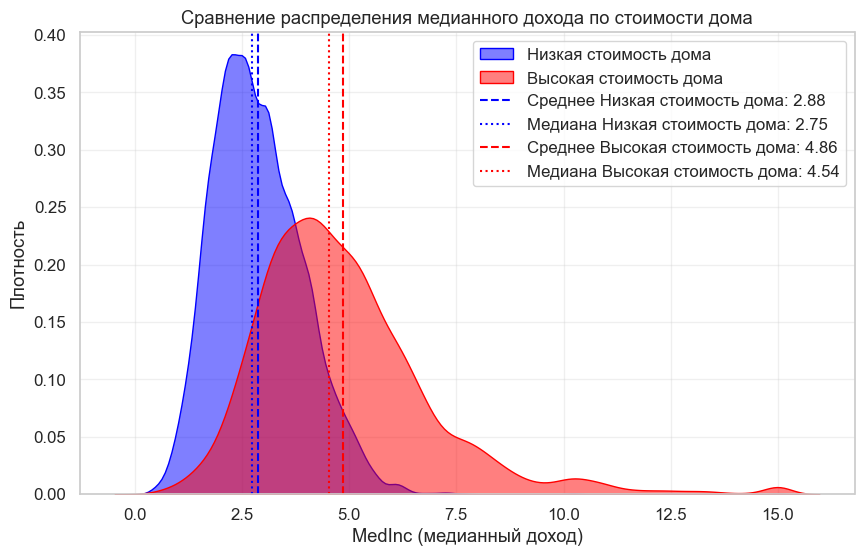

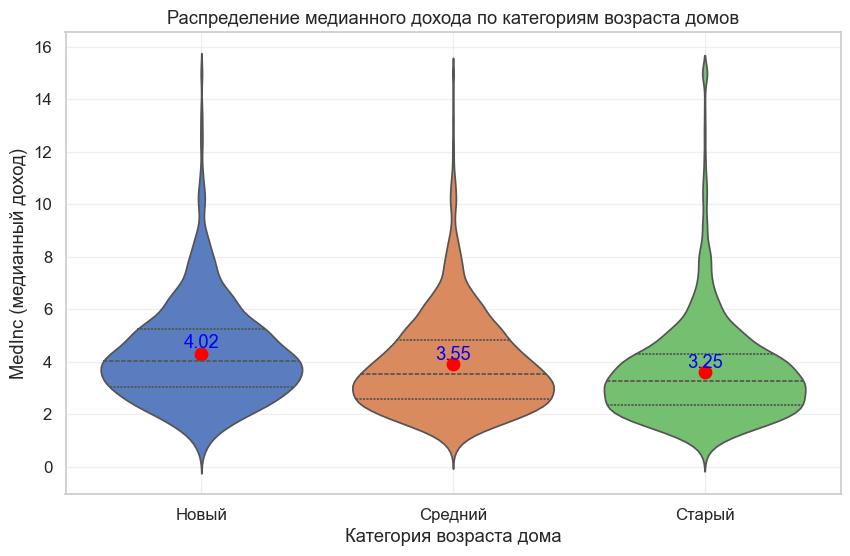

In [19]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)


median_value = housing_data["MedHouseVal"].median()
high_value = housing_data[housing_data["MedHouseVal"] >= median_value]
low_value = housing_data[housing_data["MedHouseVal"] < median_value]

plt.figure(figsize=(10, 6))
sns.kdeplot(
    low_value["MedInc"],
    color="blue",
    fill=True,
    alpha=0.5,
    label="Низкая стоимость дома",
)
sns.kdeplot(
    high_value["MedInc"],
    color="red",
    fill=True,
    alpha=0.5,
    label="Высокая стоимость дома",
)

# Добавление статистик
for data, color, label in zip(
    [low_value, high_value],
    ["blue", "red"],
    ["Низкая стоимость дома", "Высокая стоимость дома"],
):
    mean_val = data["MedInc"].mean()
    median_val = data["MedInc"].median()
    plt.axvline(
        mean_val, color=color, linestyle="--", label=f"Среднее {label}: {mean_val:.2f}"
    )
    plt.axvline(
        median_val,
        color=color,
        linestyle=":",
        label=f"Медиана {label}: {median_val:.2f}",
    )

plt.title("Сравнение распределения медианного дохода по стоимости дома")
plt.xlabel("MedInc (медианный доход)")
plt.ylabel("Плотность")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Категории возраста домов
bins = [0, 15, 35, housing_data["HouseAge"].max()]
labels = ["Новый", "Средний", "Старый"]
housing_data["HouseAgeCat"] = pd.cut(housing_data["HouseAge"], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))

sns.violinplot(
    x="HouseAgeCat", y="MedInc", data=housing_data, inner="quartile", palette="muted"
)

# Добавление статистик
for i, cat in enumerate(labels):
    subset = housing_data[housing_data["HouseAgeCat"] == cat]["MedInc"]
    mean_val = subset.mean()
    median_val = subset.median()
    plt.scatter(
        i, mean_val, color="red", s=80, label=f"Среднее {cat}" if i == 0 else ""
    )
    plt.text(i, median_val + 0.5, f"{median_val:.2f}", ha="center", color="blue")

plt.title("Распределение медианного дохода по категориям возраста домов")
plt.xlabel("Категория возраста дома")
plt.ylabel("MedInc (медианный доход)")
plt.grid(alpha=0.3)
plt.show()

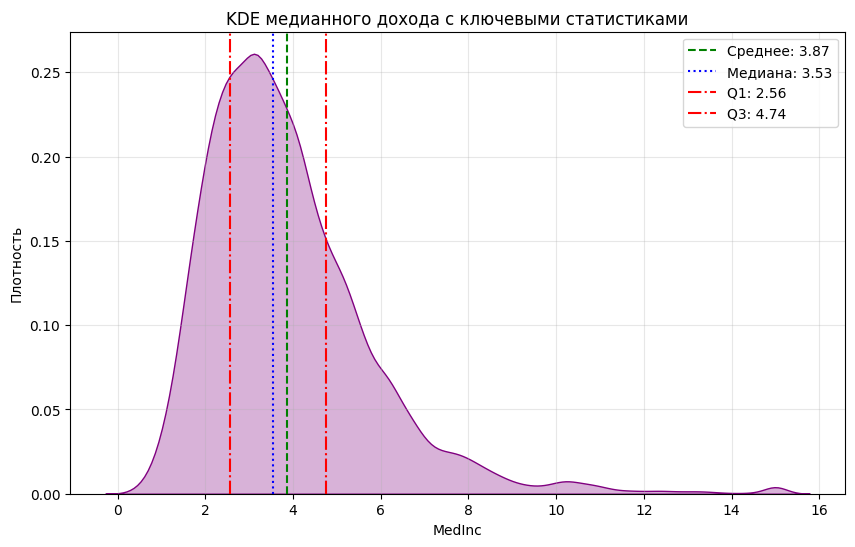

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(housing_data["MedInc"], color="purple", fill=True, alpha=0.3)

mean_val = housing_data["MedInc"].mean()
median_val = housing_data["MedInc"].median()
q1, q3 = housing_data["MedInc"].quantile([0.25, 0.75])

plt.axvline(mean_val, color="green", linestyle="--", label=f"Среднее: {mean_val:.2f}")
plt.axvline(median_val, color="blue", linestyle=":", label=f"Медиана: {median_val:.2f}")
plt.axvline(q1, color="red", linestyle="-.", label=f"Q1: {q1:.2f}")
plt.axvline(q3, color="red", linestyle="-.", label=f"Q3: {q3:.2f}")

plt.title("KDE медианного дохода с ключевыми статистиками")
plt.xlabel("MedInc")
plt.ylabel("Плотность")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

<class 'pandas.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  category
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capitalgain     48842 non-null  category
 11  capitalloss     48842 non-null  category
 12  hoursperweek    48842 non-null  category
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(13), int64(2)
memory usage: 1.4 MB
None
             fnlwgt  education-num
count  4.884200e+04   48842.

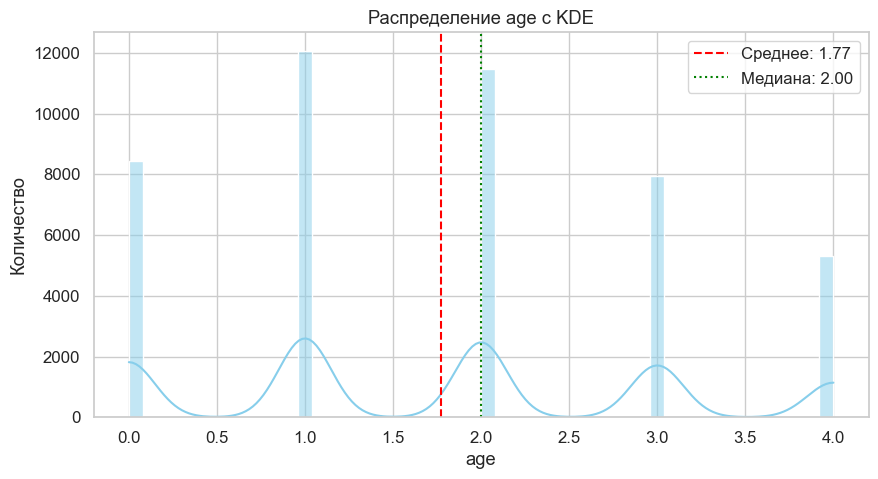

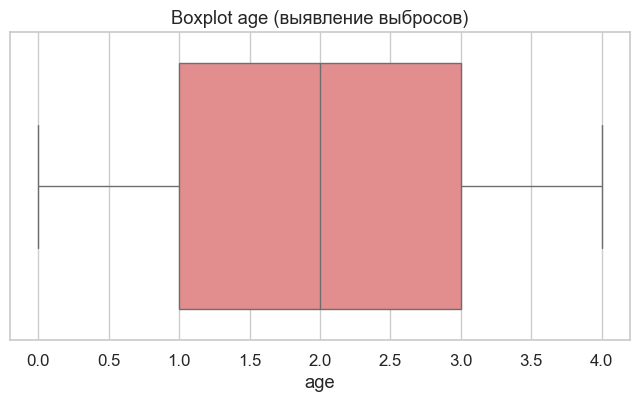

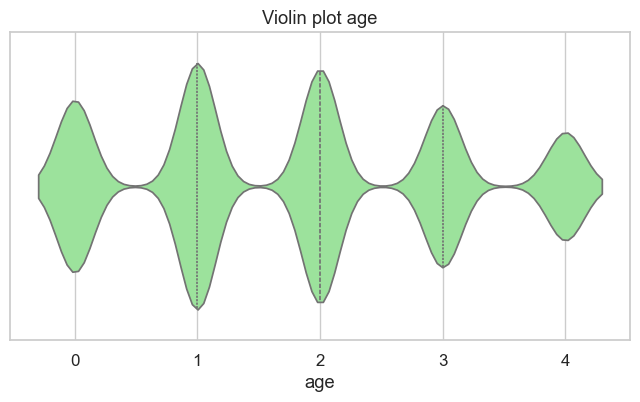

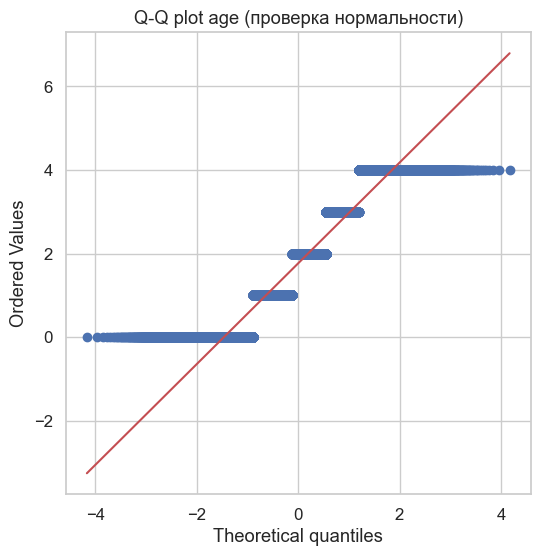

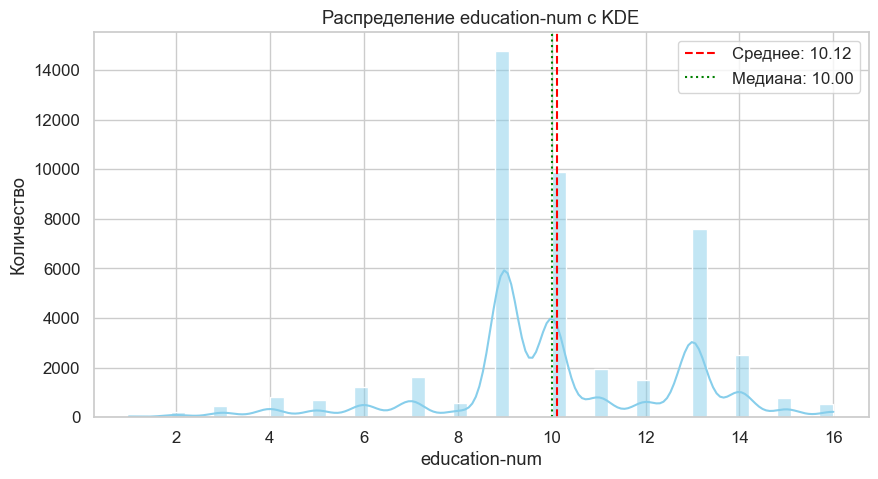

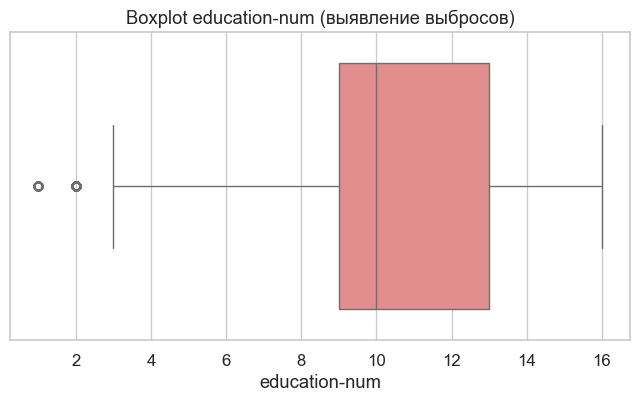

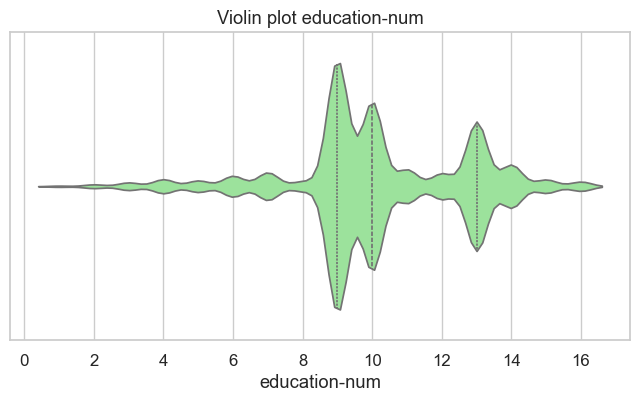

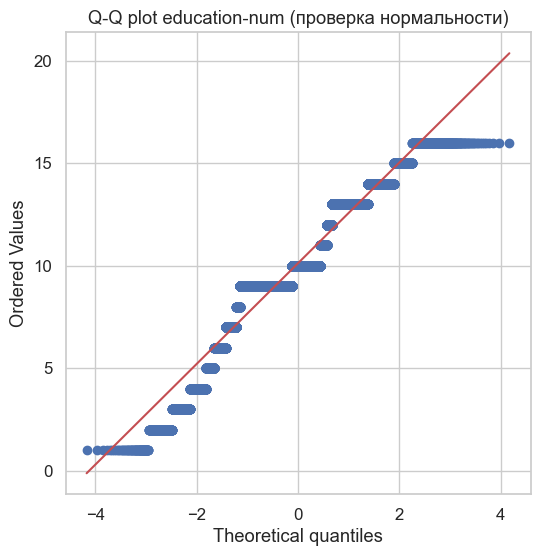

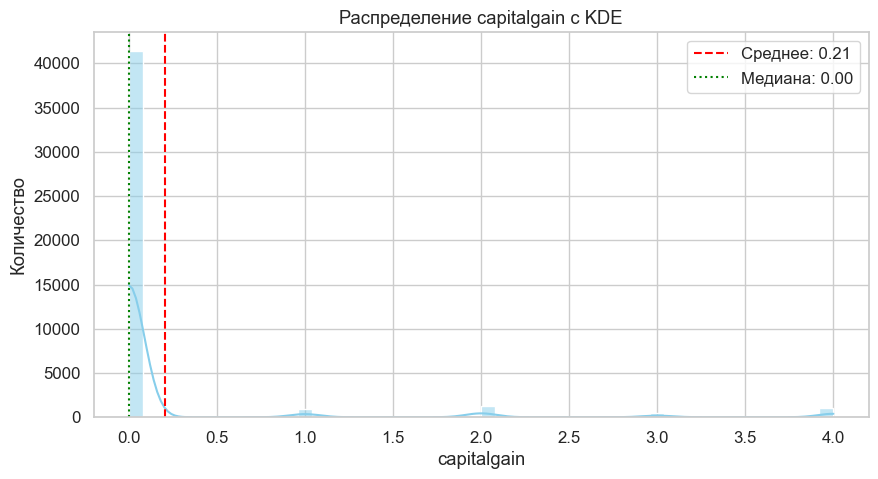

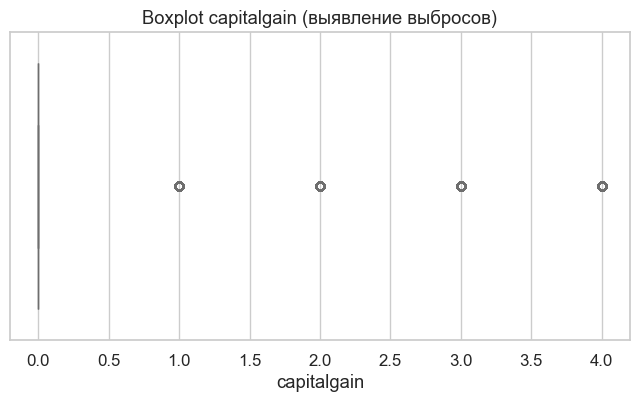

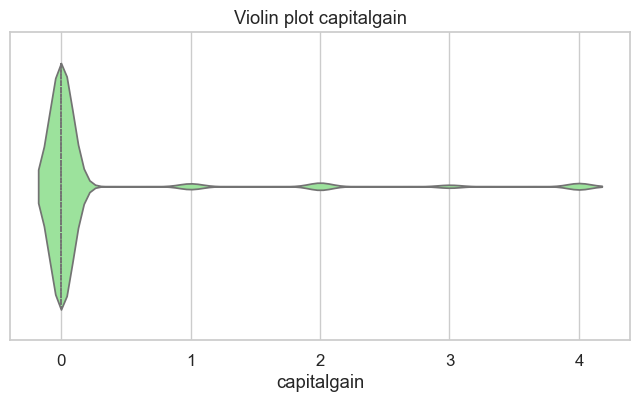

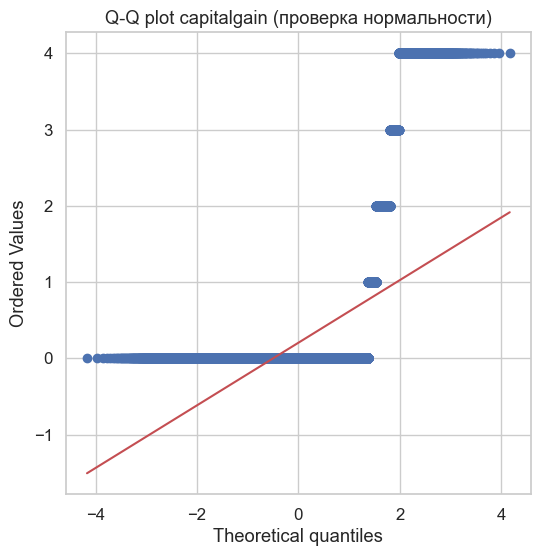

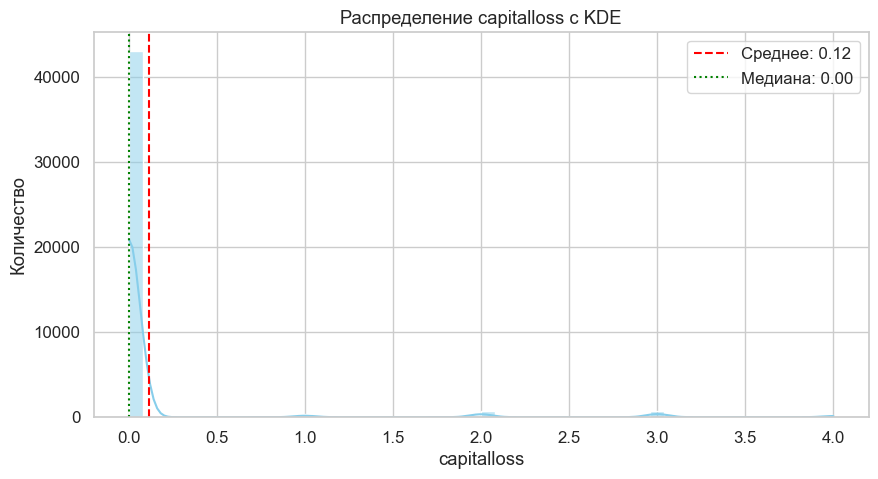

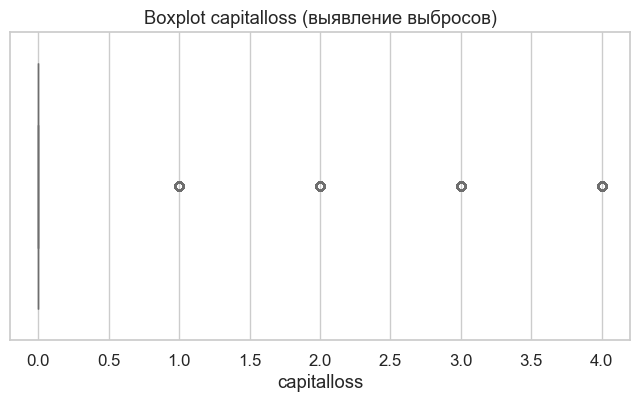

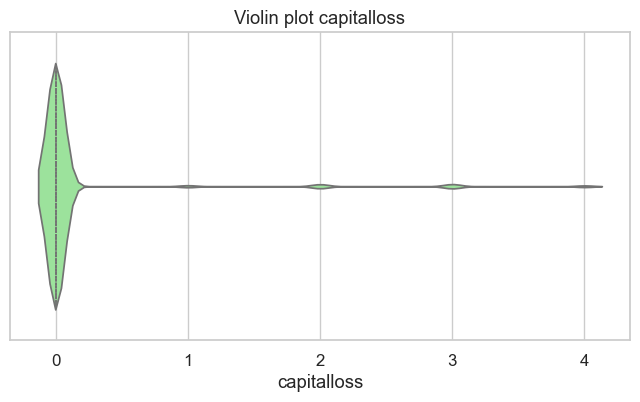

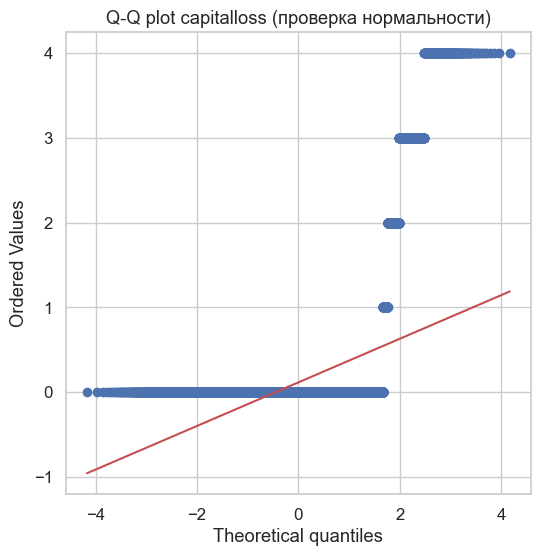

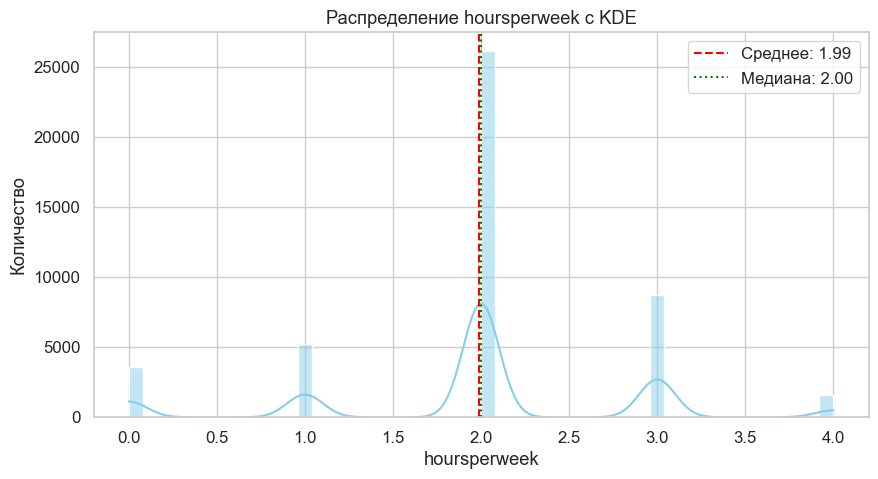

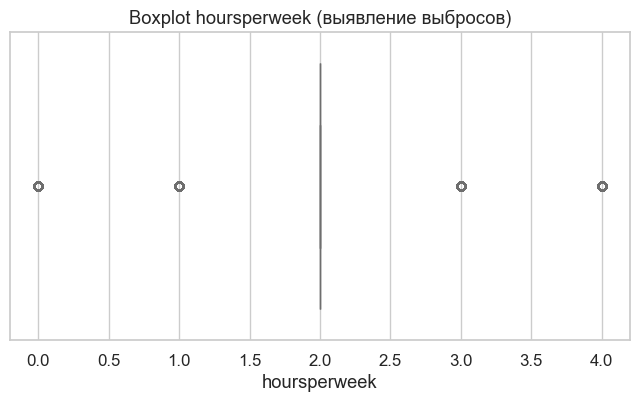

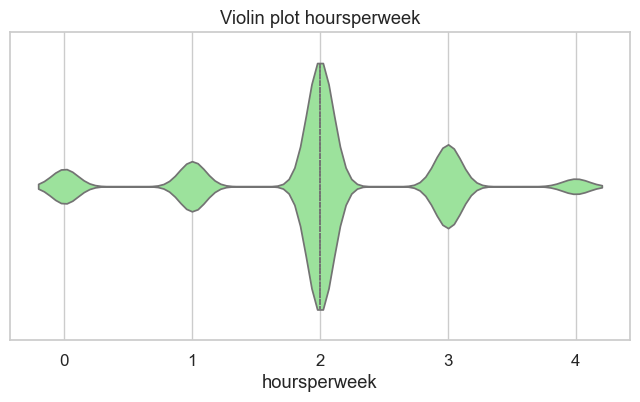

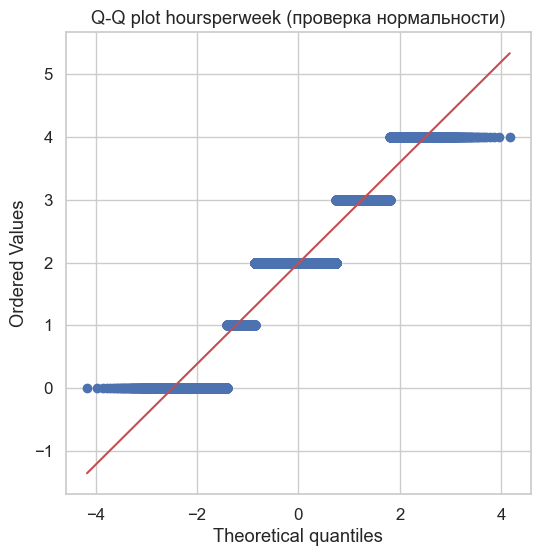

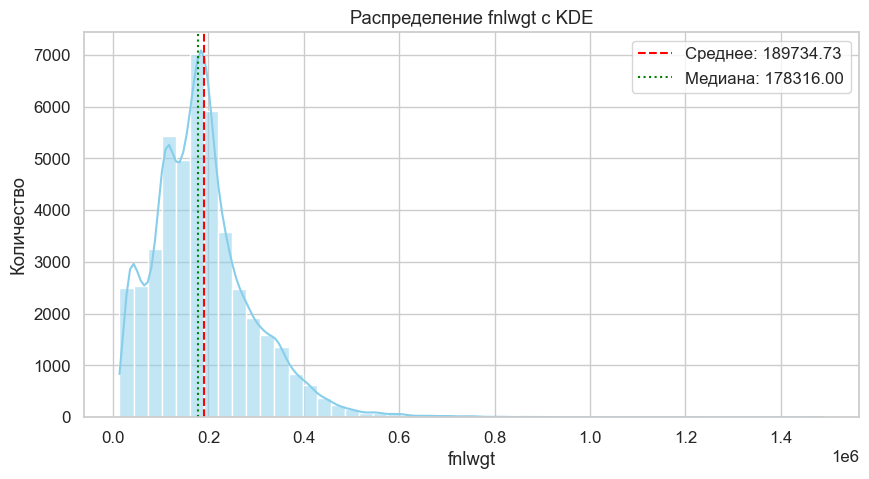

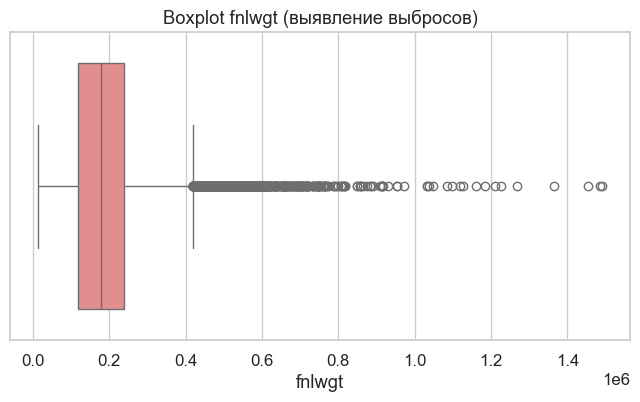

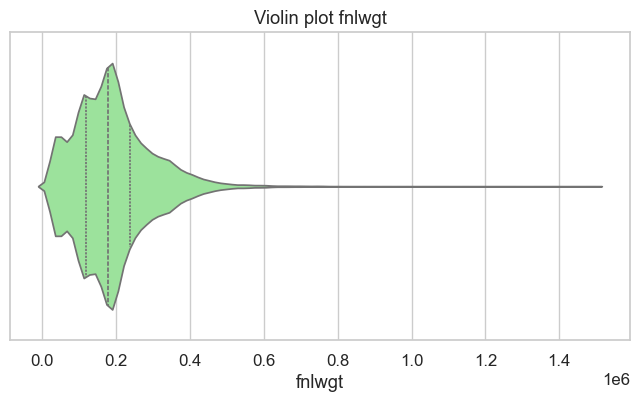

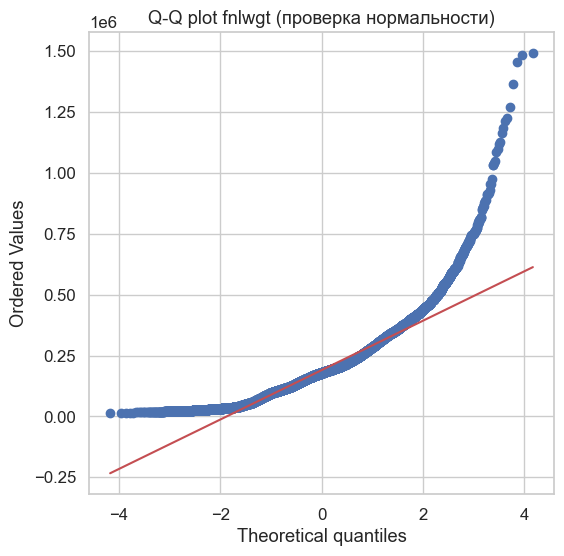

In [14]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Загрузка данных
adult = fetch_openml(name="adult", version=1, as_frame=True)
income_data = adult.frame

# Первичный анализ структуры
print(income_data.info())
print(income_data.describe())
print(income_data.head())

# Заменим пропущенные значения '?'
income_data.replace("?", np.nan, inplace=True)

# Удалим строки с пропущенными значениями
income_data.dropna(inplace=True)

# Создаем бинарный признак дохода
income_data["income_binary"] = income_data["class"].apply(
    lambda x: 1 if x == ">50K" else 0
)

num_features = [
    "age",
    "education-num",
    "capitalgain",
    "capitalloss",
    "hoursperweek",
    "fnlwgt",
]

# Приведение к числовому типу
for feature in num_features:
    income_data[feature] = pd.to_numeric(income_data[feature], errors="coerce")


sns.set(style="whitegrid", font_scale=1.1)

for feature in num_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(income_data[feature], kde=True, color="skyblue", bins=50)
    plt.title(f"Распределение {feature} с KDE")
    plt.xlabel(feature)
    plt.ylabel("Количество")

    # Boxplot и аннотации статистики
    q1, median, q3 = income_data[feature].quantile([0.25, 0.5, 0.75])
    mean_val = income_data[feature].mean()
    plt.axvline(mean_val, color="red", linestyle="--", label=f"Среднее: {mean_val:.2f}")
    plt.axvline(median, color="green", linestyle=":", label=f"Медиана: {median:.2f}")
    plt.legend()
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=income_data[feature], color="lightcoral")
    plt.title(f"Boxplot {feature} (выявление выбросов)")
    plt.show()

    # Violin plot
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=income_data[feature], color="lightgreen", inner="quartile")
    plt.title(f"Violin plot {feature}")
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(6, 6))
    stats.probplot(income_data[feature], dist="norm", plot=plt)
    plt.title(f"Q-Q plot {feature} (проверка нормальности)")
    plt.show()

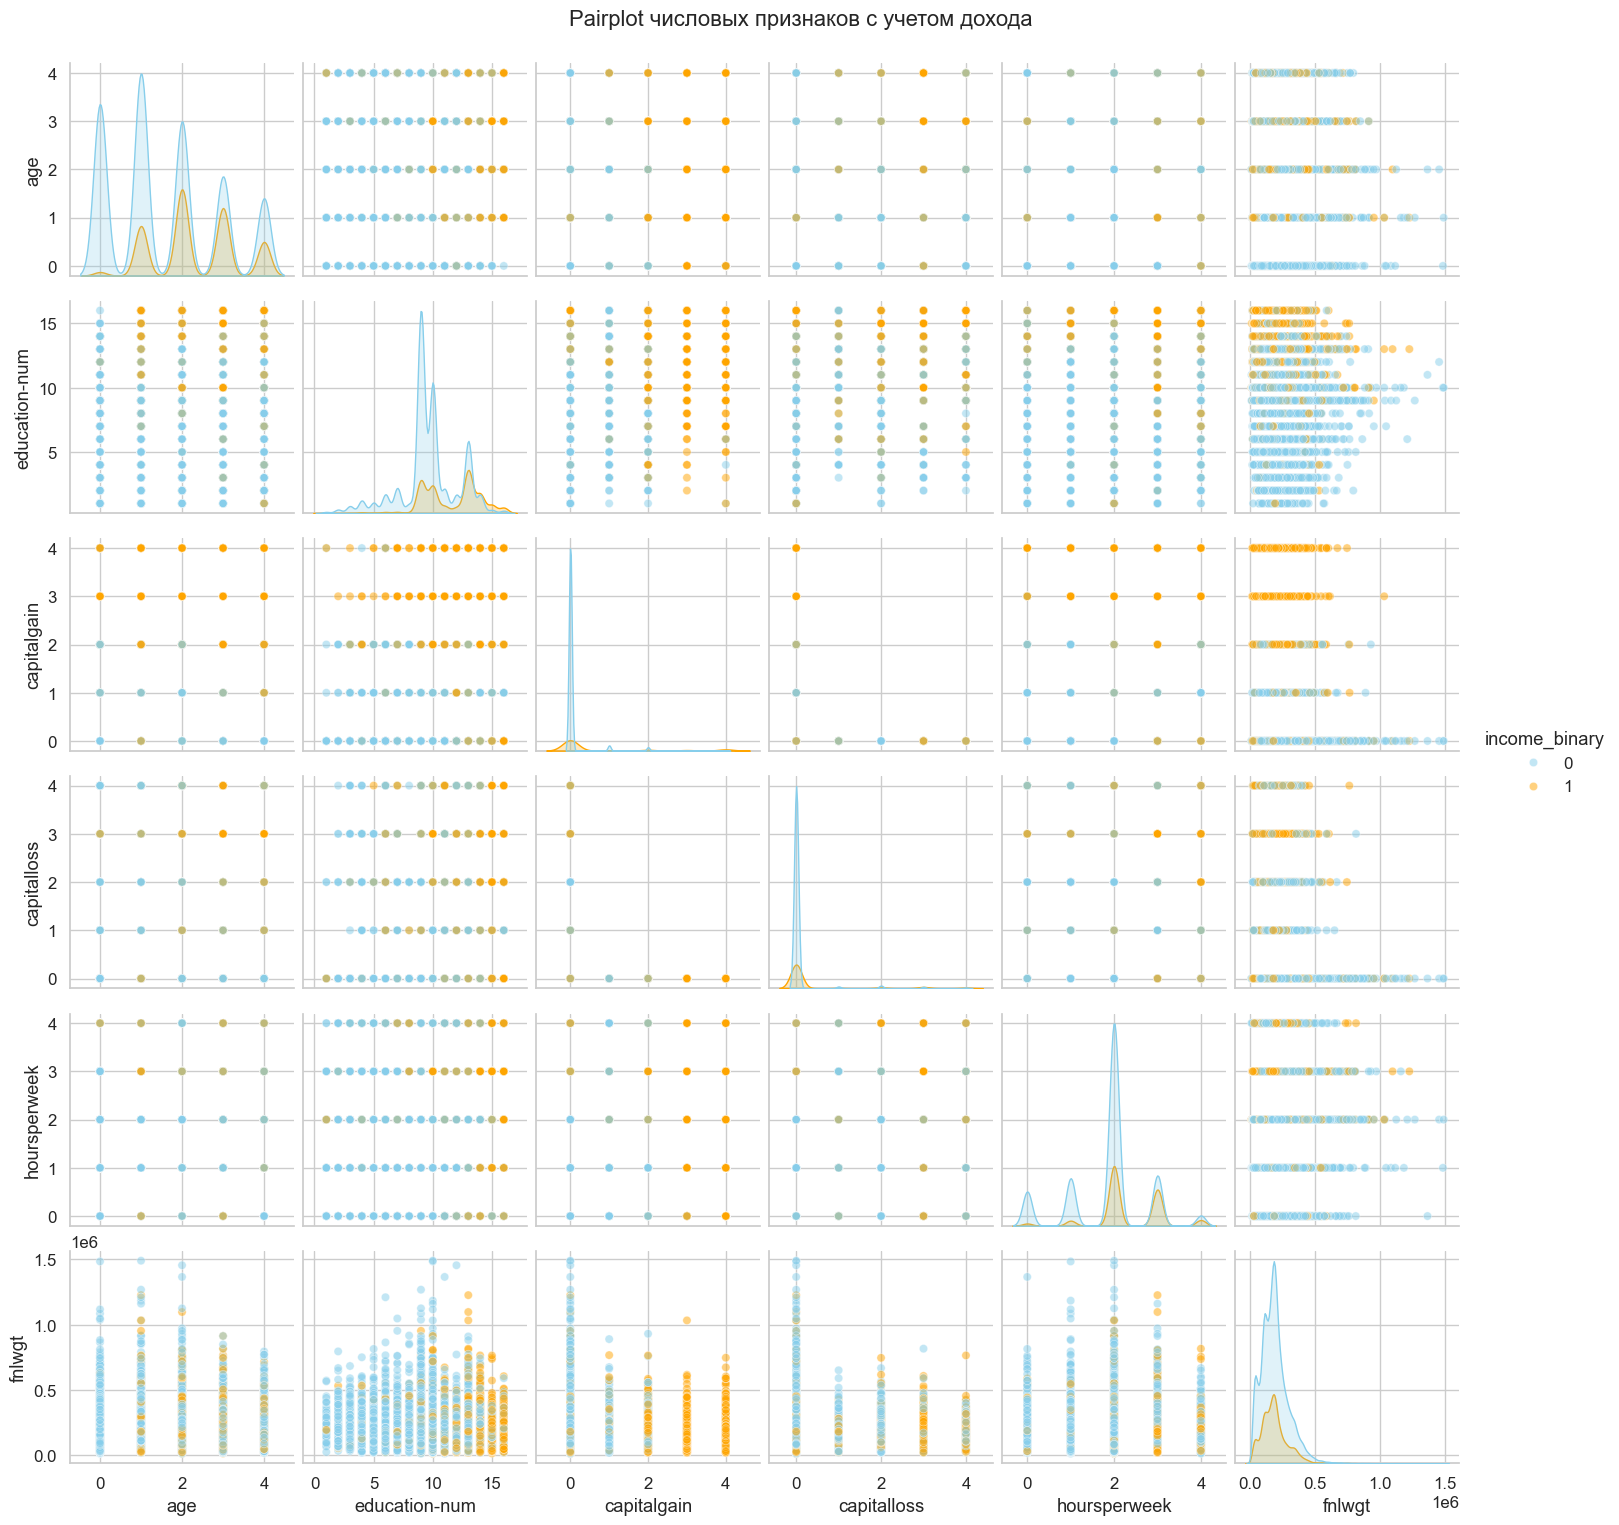

In [15]:
sns.pairplot(
    income_data[num_features + ["income_binary"]],
    hue="income_binary",
    palette={0: "skyblue", 1: "orange"},
    diag_kind="kde",
    plot_kws={"alpha": 0.5},
)
plt.suptitle("Pairplot числовых признаков с учетом дохода", y=1.02)
plt.show()

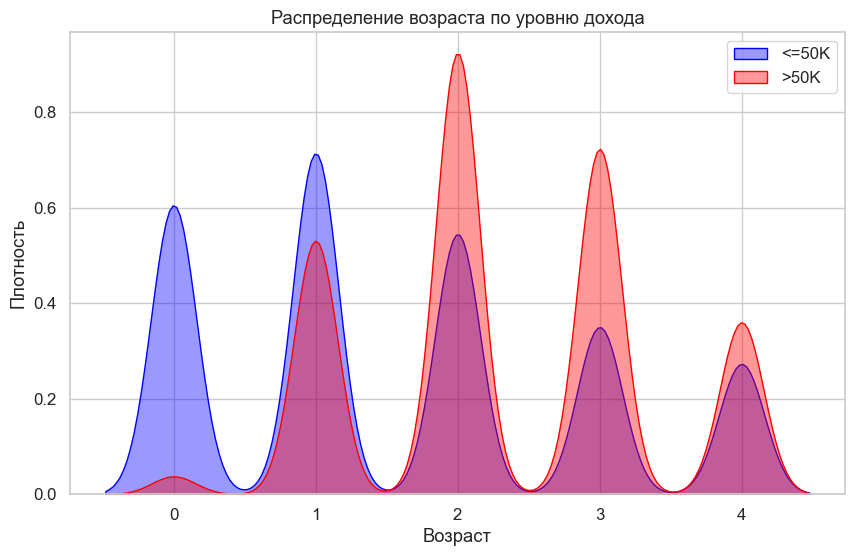

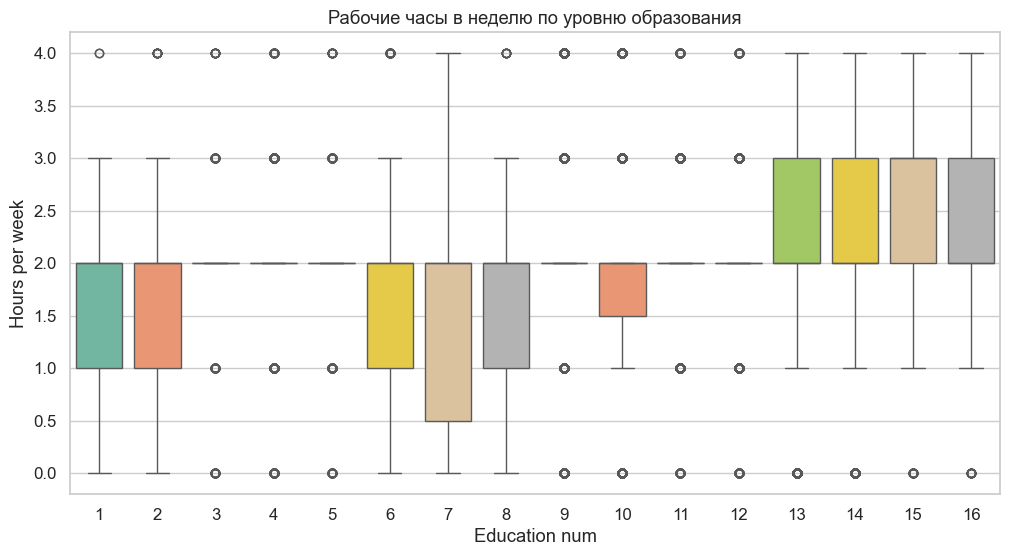

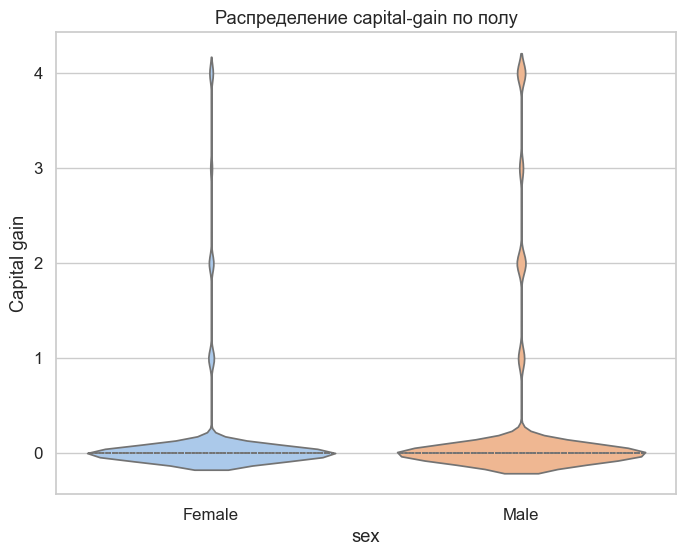

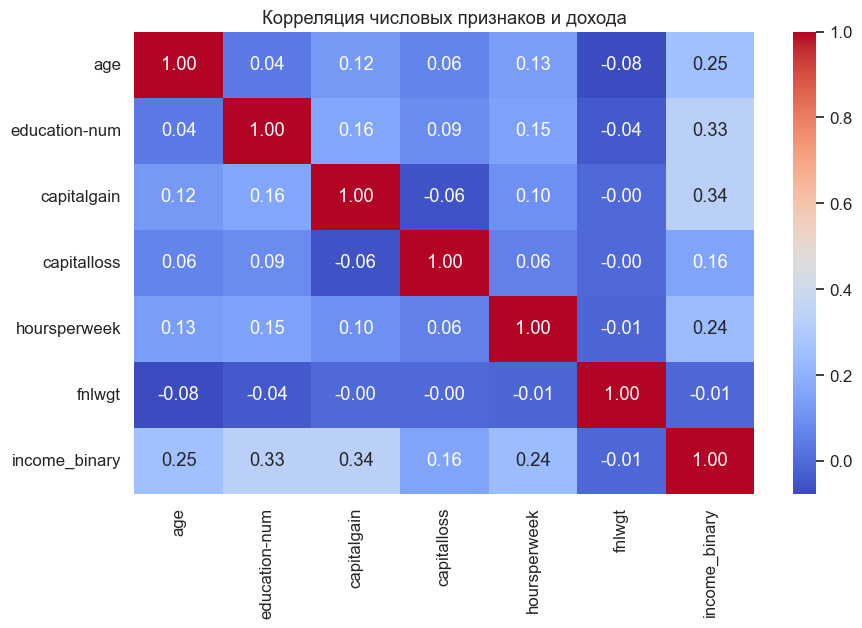

In [9]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize=(10, 6))
sns.kdeplot(
    income_data[income_data["income_binary"] == 0]["age"],
    color="blue",
    fill=True,
    alpha=0.4,
    label="<=50K",
)
sns.kdeplot(
    income_data[income_data["income_binary"] == 1]["age"],
    color="red",
    fill=True,
    alpha=0.4,
    label=">50K",
)
plt.title("Распределение возраста по уровню дохода")
plt.xlabel("Возраст")
plt.ylabel("Плотность")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="education-num", y="hoursperweek", data=income_data, palette="Set2")
plt.title("Рабочие часы в неделю по уровню образования")
plt.xlabel("Education num")
plt.ylabel("Hours per week")
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(
    x="sex", y="capitalgain", data=income_data, inner="quartile", palette="pastel"
)
plt.title("Распределение capital-gain по полу")
plt.ylabel("Capital gain")
plt.show()

plt.figure(figsize=(10, 6))
corr = income_data[num_features + ["income_binary"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция числовых признаков и дохода")
plt.show()